# Delivery Route Optimization using Linear Programming (TSP)
This notebook solves a delivery routing problem using optimization techniques with the PuLP library in Python.

**Goal**: Minimize the total distance required to deliver packages to multiple locations and return to the warehouse.

We model this as a classic **Traveling Salesman Problem (TSP)**.


#SETUP LIBRARIES

import pulp

import numpy as np

import matplotlib.pyplot as plt


## Problem Setup

We have 6 locations:
- 0 = Warehouse
- 1–5 = Delivery Points

The distances (in km) between locations are stored in a matrix:


locations = list(range(6))  # 0 is warehouse
n = len(locations)

distance_matrix = [
   
    [0, 29, 20, 21, 16, 31],
    [29, 0, 15, 29, 28, 40],
    [20, 15, 0, 15, 14, 25],
    [21, 29, 15, 0, 28, 16],
    [16, 28, 14, 28, 0, 20],
    [31, 40, 25, 16, 20, 0]
]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 45.7 MB/s eta 0:00:00
Status: Optimal

Optimal route:
0 -> 1
1 -> 2
2 -> 3
3 -> 5
5 -> 4
4 -> 0


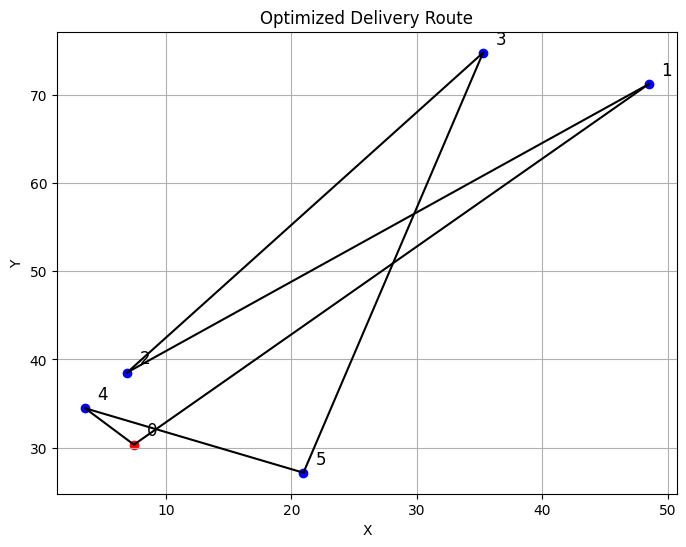

In [12]:
!pip install pulp
import pulp
import numpy as np
import matplotlib.pyplot as plt

# Locations: 0 = Warehouse, 1-5 = Delivery Points

locations = list(range(6))
n = len(locations)

# Distance matrix

distance_matrix = [
    [0, 29, 20, 21, 16, 31],
    [29, 0, 15, 29, 28, 40],
    [20, 15, 0, 15, 14, 25],
    [21, 29, 15, 0, 28, 16],
    [16, 28, 14, 28, 0, 20],
    [31, 40, 25, 16, 20, 0]
]

# Define the problem

prob = pulp.LpProblem("Delivery_Route_Optimization", pulp.LpMinimize)

# Decision variables

x = pulp.LpVariable.dicts('x', ((i, j) for i in locations for j in locations if i != j), cat='Binary')
u = pulp.LpVariable.dicts('u', locations, lowBound=0, upBound=n-1, cat='Integer')

# Objective function: minimize total distance

prob += pulp.lpSum(distance_matrix[i][j] * x[i, j] for i in locations for j in locations if i != j)

# Constraints

for i in locations:
    prob += pulp.lpSum(x[i, j] for j in locations if j != i) == 1  # leave each location once
    prob += pulp.lpSum(x[j, i] for j in locations if j != i) == 1  # enter each location once

# Subtour elimination (MTZ constraints)

for i in locations:
    for j in locations:
        if i != j and i != 0 and j != 0:
            prob += u[i] - u[j] + (n - 1) * x[i, j] <= n - 2

# Solve the problem

prob.solve()

# Print the status

print(f"Status: {pulp.LpStatus[prob.status]}")

# Get the route

route = []
current = 0
visited = set()
while True:
    visited.add(current)
    for j in locations:
        if j != current and pulp.value(x[current, j]) == 1:
            route.append((current, j))
            current = j
            break
    if current == 0:
        break

print("\nOptimal route:")
for leg in route:
    print(f"{leg[0]} -> {leg[1]}")

# Visualize the route (optional, random coordinates)

coords = np.random.rand(n, 2) * 100
plt.figure(figsize=(8, 6))
for i, (x_, y_) in enumerate(coords):
    plt.scatter(x_, y_, c='red' if i == 0 else 'blue')
    plt.text(x_+1, y_+1, str(i), fontsize=12)

for (i, j) in route:
    plt.plot([coords[i][0], coords[j][0]], [coords[i][1], coords[j][1]], 'k-')

plt.title("Optimized Delivery Route")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
import pulp
import numpy as np
import matplotlib.pyplot as plt



## Summary & Insights

- ✅ Each location is visited exactly once
- ✅ The model returns to the warehouse
- 🔄 Total distance is minimized based on the provided matrix
- 🧠 This approach can be extended to more complex real-world routing problems using real coordinates and APIs

**Tools used**: Python, PuLP, NumPy, Matplotlib
